In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_excel('C:/Users/Admin/Downloads/Company_Data2015.xlsx',sheet_name='Sheet2')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
Company.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

In [4]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '').str.replace('[', '').str.replace(']', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [5]:
Company.rename(columns={'Gross_Block_':'Gross_Block','Net_Working_Capital_':'Net_Working_Capital','Current_Assets_':'Current_Assets',\
                       'Current_Liabilities_and_Provisions_':'Current_Liabilities_and_Provisions','Total_Assets_to_Liabilities_':
                       'Total_Assets_to_Liabilities','Book_Value_Adj._Unit_Curr':'Book_Value_Adj_Unit_Curr'}, inplace=True)

In [6]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [ ]:
Company.info()

- There are very few missing values, only in few columns
- numerical/categorical columns properly mapped



In [ ]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe().T

In [7]:
Company.size

240262

In [8]:
Company.isnull().sum().sum()

118

In [9]:
(118/240262)*100

0.04911305158535265

- It is just 0.05% of the missing values present in the dataset.
- inventory velocity days - just 3% of the total is missing
- inventory velocity days - easily pointed out the bad data with -199 can be subsituted to 199, could be a data entry issue

# inspect by row wise

In [ ]:
Company.isnull().sum(axis = 1).sort_values(ascending=False)

In [10]:
# Dropping row more than 11 column values are empty
Company.drop(Company[(Company['Co_Code'] == 3240)].index,inplace=True)

In [ ]:
Company.shape

In [ ]:
Company.isnull().sum().sort_values(ascending=False)

# Treating Missing Values

In [ ]:
103/3586*100

In [ ]:
Company['Inventory_Velocity_Days'].value_counts()

In [11]:
# Mode imputation
Company['Inventory_Velocity_Days']=Company['Inventory_Velocity_Days'].fillna(value=0)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format   

# Company.describe().T
Company['Book_Value_Adj_Unit_Curr'].describe()

In [ ]:
Company.isnull().sum().sum()

In [12]:
Company['Book_Value_Adj_Unit_Curr'].fillna(Company['Book_Value_Unit_Curr'], inplace=True)

In [13]:
Company.isnull().sum().sum()

0

In [14]:
Company[Company['Co_Code']==495]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_RatioLatest,Fixed_Assets_RatioLatest,Inventory_RatioLatest,Debtors_RatioLatest,Total_Asset_Turnover_RatioLatest,Interest_Cover_RatioLatest,PBIDTM_percLatest,PBITM_percLatest,PBDTM_percLatest,CPM_percLatest,APATM_percLatest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
318,495,Samtel (India),-1.61,7.08,-1.51,-1.4,0.11,0.02,-2.37,2.79,5.15,3.75,0.0,0.0,0.19,0.0,0.0,0.01,-0.17,-0.23,-0.17,-0.23,-0.23,-0.23,-0.23,0.0,0.0,0.0,-2.12,-2.12,4.58,-0.32,0.06,0.02,-0.06,-17.97,-19.66,-92.31,0.0,0.0,-100.0,-33.16,90.17,87.5,90.17,87.5,87.5,87.5,0.0,0.0,195.48,0.52,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.0,0.0,0,13870,0.0,0.0,0.0


# Univariate & MultiVariate Analysis

In [ ]:
Company2=Company[['ROG_Cost_of_Production_perc','Inventory_RatioLatest','Current_RatioLatest','Interest_Cover_RatioLatest','Debtors_Velocity_Days','ROG_Net_Worth_perc','ROG_Total_Assets_perc','ROG_Capital_Employed_perc','Book_Value_Unit_Curr','default']]

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(Company['default'])

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = Company['ROG_Cost_of_Production_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.boxplot(y = Company['Inventory_RatioLatest'])
# plt.show()
plt.subplot(1,3,3)
sns.boxplot(y = Company['Interest_Cover_RatioLatest'])
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(Company['ROG_Cost_of_Production_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.distplot(Company['Inventory_RatioLatest'])
# plt.show()
plt.subplot(1,3,3)
sns.distplot(Company['Interest_Cover_RatioLatest'])
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = Company['Current_RatioLatest'])
plt.subplot(1,3,2)
sns.boxplot(y = Company['Debtors_Velocity_Days'])
plt.subplot(1,3,3)
sns.boxplot(y = Company['ROG_Net_Worth_perc'])
plt.show()


In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(Company['Current_RatioLatest'])
plt.subplot(1,3,2)
sns.distplot(Company['Debtors_Velocity_Days'])
plt.subplot(1,3,3)
sns.distplot(Company['ROG_Net_Worth_perc'])
plt.show()


In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = Company['ROG_Total_Assets_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.boxplot(y = Company['ROG_Capital_Employed_perc'])
# plt.show()
plt.subplot(1,3,3)
sns.boxplot(y = Company['Book_Value_Unit_Curr'])
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(Company['ROG_Total_Assets_perc'])
# plt.show()
plt.subplot(1,3,2)
sns.distplot(Company['ROG_Capital_Employed_perc'])
# plt.show()
plt.subplot(1,3,3)
sns.distplot(Company['Book_Value_Unit_Curr'])
plt.show()

In [ ]:
num_df = Company2.select_dtypes(exclude=['object'])

for i in Company2.columns:
    print("Skewness for", i,"is: ",round(num_df[i].skew(),2))

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Company['default'], Company['Book_Value_Unit_Curr'])

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(Company['default'], Company['Net_Sales'])

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(Company['default'], Company['Inventory_Velocity_Days'])

In [ ]:
plt.subplots(figsize = (8,6))
sns.heatmap(Company[['ROG_Cost_of_Production_perc','Inventory_RatioLatest','Current_RatioLatest','Interest_Cover_RatioLatest','Debtors_Velocity_Days','ROG_Net_Worth_perc','ROG_Total_Assets_perc','ROG_Capital_Employed_perc','Book_Value_Unit_Curr']].corr(),cmap = 'plasma')
plt.show()

# Duplicates check

In [ ]:
dups = Company.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Company[dups]

In [15]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [ ]:
Company[['default','Networth_Next_Year']].tail(5)

In [ ]:
Company['default'].value_counts()

In [ ]:
# Checking proportion of default
Company['default'].value_counts(normalize=True)

Data seems highly imbalanced

In [ ]:
Company1=Company[['Networth_Next_Year', 'Equity_Paid_Up','Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block','Net_Working_Capital', 'Current_Assets',\
       'Current_Liabilities_and_Provisions', 'Total_Assets_to_Liabilities',\
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',\
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',\
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',\
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',\
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',\
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',\
       'Cash_Flow_From_Operating_Activities',\
       'Cash_Flow_From_Investing_Activities',\
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',\
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',\
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',\
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',\
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',\
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_perc',\
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',\
       'Current_RatioLatest', 'Fixed_Assets_RatioLatest',\
       'Inventory_RatioLatest', 'Debtors_RatioLatest',\
       'Total_Asset_Turnover_RatioLatest', 'Interest_Cover_RatioLatest',\
       'PBIDTM_percLatest', 'PBITM_percLatest', 'PBDTM_percLatest',\
       'CPM_percLatest', 'APATM_percLatest', 'Debtors_Velocity_Days',\
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',\
       'Value_of_Output_to_Total_Assets', 'Value_of_Output_to_Gross_Block',\
       'default']]

In [ ]:
Company1.size

In [ ]:
Q1 = Company1.quantile(0.25)
Q3 = Company1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [ ]:
((Company1 > UL) | (Company1 < LL)).sum().sum()

In [ ]:
42449/236610*100

In [ ]:
Q1 = 3.98
Q3 = 123.78
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print("UL",UL)
print("LL",LL)

In [ ]:
# outlier_df = Company1[Company1['Networth_Next_Year'] < LL]
outlier_df=Company1[(Company1['Networth_Next_Year'] >303.48) | (Company1['Networth_Next_Year'] < -175.72)]

In [ ]:
outlier_df['default'].value_counts()

In [ ]:
73/388

Remove unwanted columns

In [16]:
Company.drop(['Co_Code','Co_Name','Revenue_earnings_in_forex','Revenue_expenses_in_forex','Capital_expenses_in_forex','ROG_Revenue_earnings_in_forex_perc','ROG_Revenue_expenses_in_forex_perc','ROG_Market_Capitalisation_perc','Book_Value_Adj_Unit_Curr'],axis=1,inplace=True)

Data Entry issue

In [17]:
Company['Inventory_Velocity_Days']=Company['Inventory_Velocity_Days'].replace(-199,199)

Treat Outliers - Treatment 1

In [ ]:
plt.figure(figsize=(10,7))
Company.boxplot()
plt.xticks([])
plt.show()

In [20]:
Company_num=Company[['Equity_Paid_Up','Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block','Net_Working_Capital', 'Current_Assets',\
       'Current_Liabilities_and_Provisions', 'Total_Assets_to_Liabilities',\
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',\
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',\
       'PAT', 'Adjusted_PAT', 'CP', 'Book_Value_Unit_Curr',\
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',\
       'Cash_Flow_From_Operating_Activities',\
       'Cash_Flow_From_Investing_Activities',\
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',\
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',\
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',\
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',\
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',\
       'ROG_PAT_perc', 'ROG_CP_perc','Current_RatioLatest', 'Fixed_Assets_RatioLatest',\
       'Inventory_RatioLatest', 'Debtors_RatioLatest',\
       'Total_Asset_Turnover_RatioLatest', 'Interest_Cover_RatioLatest',\
       'PBIDTM_percLatest', 'PBITM_percLatest', 'PBDTM_percLatest',\
       'CPM_percLatest', 'APATM_percLatest', 'Debtors_Velocity_Days',\
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',\
       'Value_of_Output_to_Total_Assets', 'Value_of_Output_to_Gross_Block',\
       ]]

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
for column in Company_num.columns: 
    lr,ur=remove_outlier(Company_num[column])
    Company_num[column]=np.where(Company_num[column]>ur,ur,Company_num[column])
    Company_num[column]=np.where(Company_num[column]<lr,lr,Company_num[column])

In [ ]:
plt.figure(figsize=(10,7))
Company_num.boxplot()
plt.xticks([])
plt.show()

In [ ]:
Q1 = Company1.quantile(0.25)
Q3 = Company1.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [ ]:
((Company_num > UL) | (Company_num < LL)).sum().sum()
# Below are the outlier datas

In [23]:
Company_X=Company_num.copy()
# Company_X = Company.drop(['default','Networth_Next_Year'], axis = 1)
Company_Y = Company['default']

In [24]:
Company_X.isnull().sum().sum()

0

In [25]:
import statsmodels.formula.api as SM

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Company_X, Company_Y, 
                                                    test_size = 0.33, random_state = 42,stratify=Company['default'])

In [ ]:
Company_train = pd.concat([X_train,y_train], axis=1)
Company_test = pd.concat([X_test,y_test], axis=1)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

In [ ]:
# f_1 = 'default ~ ROG_Gross_Block_perc+Inventory_Velocity_Days+ROG_Cost_of_Production_perc+Creditors_Velocity_Days+Inventory_RatioLatest+Current_RatioLatest+Interest_Cover_RatioLatest+Cash_Flow_From_Investing_Activities+Debtors_Velocity_Days+Debtors_RatioLatest+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Total_Assets_perc+Cash_Flow_From_Operating_Activities+ROG_Capital_Employed_perc+Market_Capitalisation+Selling_Cost+Equity_Paid_Up+Other_Income+Book_Value_Unit_Curr'
f_1 = 'default ~ ROG_Cost_of_Production_perc+Inventory_RatioLatest+Current_RatioLatest+Interest_Cover_RatioLatest+Debtors_Velocity_Days+ROG_Net_Worth_perc+ROG_Total_Assets_perc+ROG_Capital_Employed_perc+Book_Value_Unit_Curr'

In [ ]:
model_1 = SM.logit(formula = f_1, data=Company_train).fit(method='bfgs')

In [ ]:
model_1.summary()

In [ ]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

In [ ]:
calc_vif(X_train[['ROG_Cost_of_Production_perc','Inventory_RatioLatest','Current_RatioLatest','Interest_Cover_RatioLatest','Debtors_Velocity_Days','ROG_Net_Worth_perc','ROG_Total_Assets_perc','ROG_Capital_Employed_perc','Book_Value_Unit_Curr']]).sort_values(by='VIF', ascending = True)

In [ ]:
sns.distplot(model_1.fittedvalues);

In [ ]:
y_predict_train = model_1.predict(X_train)
# y_predict_train

In [ ]:
sns.boxplot(x=Company['default'],y=y_predict_train)
plt.xlabel('Default');

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

In [ ]:
y_predict_test = model_1.predict(X_test)
# y_predict_test

In [ ]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [ ]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

In [ ]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

In [ ]:
y_class_pred_train=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

In [ ]:
print(metrics.classification_report(y_train,y_class_pred_train,digits=3))

In [ ]:
y_class_pred_test=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

In [ ]:
print(metrics.classification_report(y_test,y_class_pred_test,digits=3))

In [ ]:
train_auc = roc_auc_score(y_train, y_class_pred_train)
print('AUC: %.3f' % train_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Traning Record for 0.07 cut-off')

In [ ]:
test_auc = roc_auc_score(y_test, y_class_pred_test)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('Testing Record for 0.07 cut-off')

# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [29]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 50}

In [30]:
best_grid = grid_search.best_estimator_

In [31]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [32]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2141
           1       0.94      0.88      0.91       260

    accuracy                           0.98      2401
   macro avg       0.96      0.94      0.95      2401
weighted avg       0.98      0.98      0.98      2401



In [33]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.98      0.87      0.92       128

    accuracy                           0.98      1184
   macro avg       0.98      0.93      0.96      1184
weighted avg       0.98      0.98      0.98      1184



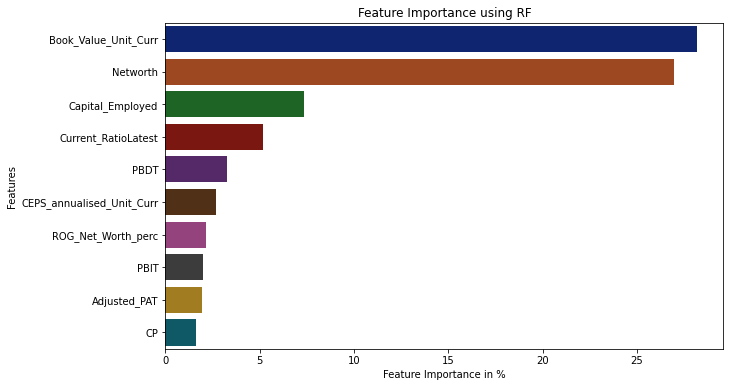

In [42]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6))
data_top=x.head(10)
data_top
sns.barplot(data_top[0],data_top.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

AUC: 0.996


Text(0, 0.5, 'True positive Rate')

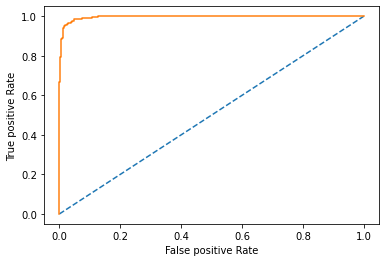

In [35]:


# predict probabilities
probs = best_grid.predict_proba(X_train)
# probs = RF_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
RF_train_auc=roc_auc_score(y_train, probs)
# RF_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')



AUC: 0.990


Text(0, 0.5, 'True positive Rate')

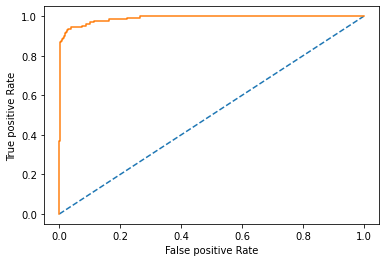

In [36]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

# Linear Discriminant Analysis

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:
LDA = LinearDiscriminantAnalysis()

In [39]:
lda_model = LDA.fit(X_train, y_train)

In [40]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [43]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2141
           1       0.83      0.56      0.67       260

    accuracy                           0.94      2401
   macro avg       0.89      0.77      0.82      2401
weighted avg       0.94      0.94      0.93      2401



In [44]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1056
           1       0.82      0.55      0.66       128

    accuracy                           0.94      1184
   macro avg       0.88      0.77      0.81      1184
weighted avg       0.93      0.94      0.93      1184



In [45]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [46]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [47]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.07426914816334489

In [48]:
y_class_pred_lda_train=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.074:
        a=1
    else:
        a=0
    y_class_pred_lda_train.append(a)

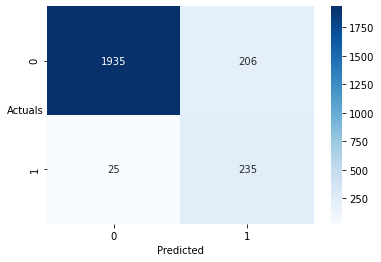

In [49]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred_lda_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [50]:
print(metrics.classification_report(y_train, y_class_pred_lda_train,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.904     0.944      2141
           1      0.533     0.904     0.670       260

    accuracy                          0.904      2401
   macro avg      0.760     0.904     0.807      2401
weighted avg      0.938     0.904     0.914      2401



In [51]:
y_class_pred_lda_test=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.074:
        a=1
    else:
        a=0
    y_class_pred_lda_test.append(a)

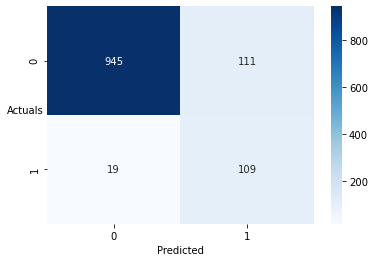

In [52]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred_lda_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [53]:
print(metrics.classification_report(y_test, y_class_pred_lda_test,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.895     0.936      1056
           1      0.495     0.852     0.626       128

    accuracy                          0.890      1184
   macro avg      0.738     0.873     0.781      1184
weighted avg      0.928     0.890     0.902      1184



AUC: 0.958


Text(0, 0.5, 'True positive Rate')

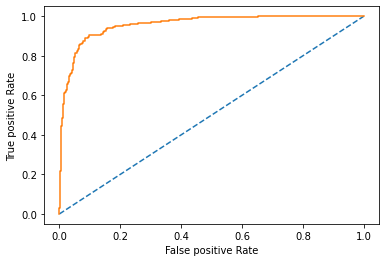

In [54]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# probs = RF_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
RF_train_auc=roc_auc_score(y_train, probs)
# RF_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

AUC: 0.950


Text(0, 0.5, 'True positive Rate')

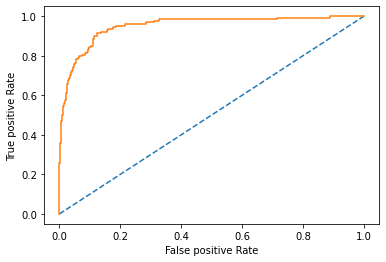

In [55]:
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

# Logistic Regression

In [56]:
log_model=LogisticRegression(random_state=1)

In [57]:
log_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [58]:
ytrain_predict = log_model.predict(X_train)
# ytrain_predict = log_model.predict(X_train_res)
ytest_predict = log_model.predict(X_test)

In [59]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
# print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_res,pred_class_train),'\n')
print('*******************************************************')
print('*******************************************************')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2141
           1       0.87      0.72      0.79       260

    accuracy                           0.96      2401
   macro avg       0.92      0.85      0.88      2401
weighted avg       0.96      0.96      0.96      2401
 

*******************************************************
*******************************************************
Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1056
           1       0.82      0.70      0.75       128

    accuracy                           0.95      1184
   macro avg       0.89      0.84      0.86      1184
weighted avg       0.95      0.95      0.95      1184
 



In [60]:
# Training Data Probability Prediction
pred_log_prob_train = log_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_log_prob_test = log_model.predict_proba(X_test)

In [61]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_log_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    print('precision Score',round(metrics.precision_score(y_train,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.908
F1 Score 0.6909 

precision Score 0.5429 

0.2 

Accuracy Score 0.9417
F1 Score 0.7697 

precision Score 0.6724 

0.3 

Accuracy Score 0.9521
F1 Score 0.7913 

precision Score 0.7491 

0.4 

Accuracy Score 0.9546
F1 Score 0.7875 

precision Score 0.7984 

0.5 

Accuracy Score 0.9584
F1 Score 0.789 

precision Score 0.8738 

0.6 

Accuracy Score 0.9563
F1 Score 0.764 

precision Score 0.9189 

0.7 

Accuracy Score 0.95
F1 Score 0.7156 

precision Score 0.9321 

0.8 

Accuracy Score 0.9434
F1 Score 0.6617 

precision Score 0.9366 

0.9 

Accuracy Score 0.9375
F1 Score 0.6032 

precision Score 0.9661 



In [62]:
threshold=0.4
predicted = (log_model.predict_proba(X_test)[:,1]>=threshold).astype('int')

In [63]:
predicted1 = (log_model.predict_proba(X_train)[:,1]>=threshold).astype('int')

In [64]:
print(classification_report(y_train, predicted1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2141
           1       0.80      0.78      0.79       260

    accuracy                           0.95      2401
   macro avg       0.89      0.88      0.88      2401
weighted avg       0.95      0.95      0.95      2401



In [65]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1056
           1       0.77      0.75      0.76       128

    accuracy                           0.95      1184
   macro avg       0.87      0.86      0.87      1184
weighted avg       0.95      0.95      0.95      1184



AUC: 0.977


Text(0, 0.5, 'True positive Rate')

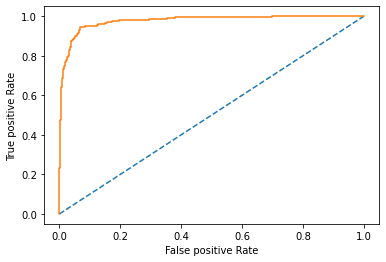

In [66]:
# predict probabilities
probs = log_model.predict_proba(X_train)
# probs = RF_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
# auc = roc_auc_score(y_train_res, probs)
RF_train_auc=roc_auc_score(y_train, probs)
# RF_train_auc=roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
# train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

AUC: 0.969


Text(0, 0.5, 'True positive Rate')

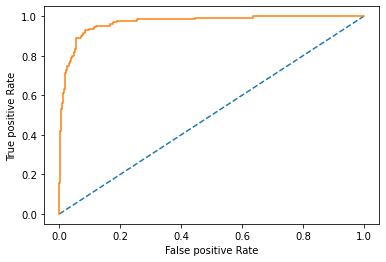

In [67]:
# predict probabilities
probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
# test_auc = roc_auc_score(y_test, probs)
RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')

Area under the curve for LDA Classification Model is 0.8732244318181819
Area under the curve for Random Forest Classification Model is 0.9326467803030303
Area under the curve for Logisitic Classification Model is 0.8386600378787878


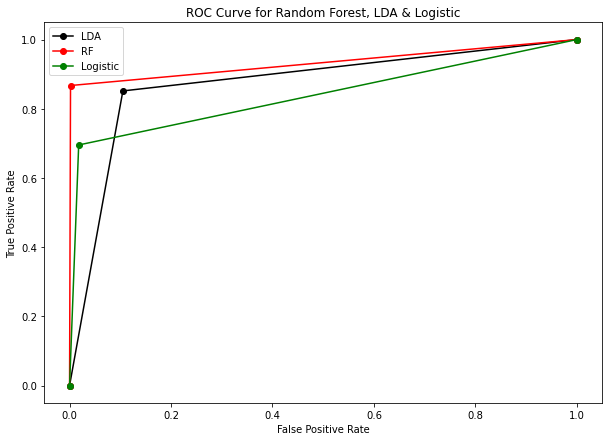

In [68]:
models_names={lda_model:'LDA',best_grid:'RF',log_model:'Logistic'}

# print('Area under the curve for LDA Classification Model is',roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))
# print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

print('Area under the curve for LDA Classification Model is',roc_auc_score(y_test, y_class_pred_lda_test))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(y_test, pred_test_rf))
print('Area under the curve for Logisitic Classification Model is',roc_auc_score(y_test, ytest_predict))

plt.figure(figsize=(10,7))

# fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, y_class_pred_lda_test)
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='black') 

# fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, pred_test_rf)
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='red') 

# fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, ytest_predict)
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='green') 

plt.title('ROC Curve for {}'.format('Random Forest, LDA & Logistic'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()

# Market Risk Dataset - FRA Milestone 2

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

# from iexfinance.stocks import get_historical_data
# from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [70]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

In [71]:
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [72]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('&', '')

In [73]:
stock_prices.rename(columns={'Mahindra__Mahindra':'Mahindra'}, inplace=True)

In [74]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [75]:
stock_prices['Date'] = [pd.to_datetime(d,format='%d-%m-%Y') for d in stock_prices['Date']]

In [76]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           314 non-null    datetime64[ns]
 1   Infosys        314 non-null    int64         
 2   Indian_Hotel   314 non-null    int64         
 3   Mahindra       314 non-null    int64         
 4   Axis_Bank      314 non-null    int64         
 5   SAIL           314 non-null    int64         
 6   Shree_Cement   314 non-null    int64         
 7   Sun_Pharma     314 non-null    int64         
 8   Jindal_Steel   314 non-null    int64         
 9   Idea_Vodafone  314 non-null    int64         
 10  Jet_Airways    314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


In [77]:
stock_prices['Date']

0     2014-03-31
1     2014-04-07
2     2014-04-14
3     2014-04-21
4     2014-04-28
5     2014-05-05
6     2014-05-12
7     2014-05-19
8     2014-05-26
9     2014-06-02
10    2014-06-09
11    2014-06-16
12    2014-06-23
13    2014-06-30
14    2014-07-07
15    2014-07-14
16    2014-07-21
17    2014-07-28
18    2014-08-04
19    2014-08-11
20    2014-08-18
21    2014-08-25
22    2014-09-01
23    2014-09-08
24    2014-09-15
25    2014-09-22
26    2014-09-29
27    2014-10-06
28    2014-10-13
29    2014-10-20
30    2014-10-27
31    2014-11-03
32    2014-11-10
33    2014-11-17
34    2014-11-24
35    2014-12-01
36    2014-12-08
37    2014-12-15
38    2014-12-22
39    2014-12-29
40    2015-01-05
41    2015-01-12
42    2015-01-19
43    2015-01-26
44    2015-02-02
45    2015-02-09
46    2015-02-16
47    2015-02-23
48    2015-03-02
49    2015-03-09
50    2015-03-16
51    2015-03-23
52    2015-03-30
53    2015-04-06
54    2015-04-13
55    2015-04-20
56    2015-04-27
57    2015-05-04
58    2015-05-

Text(0, 0.5, 'Price')

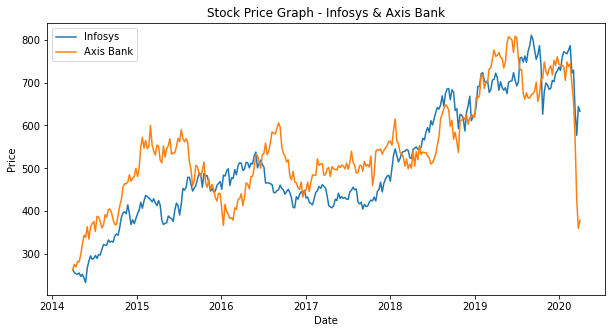

In [78]:
plt.figure(figsize=(10,5))
plt.plot(stock_prices['Date'],stock_prices['Infosys'])
plt.plot(stock_prices['Date'],stock_prices['Axis_Bank'])
plt.legend(["Infosys", "Axis Bank"])
plt.title("Stock Price Graph - Infosys & Axis Bank")
plt.xlabel("Date")
plt.ylabel("Price")

In [79]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-04-07,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243


In [80]:
stock_prices.mean()

Infosys            511.340764
Indian_Hotel       114.560510
Mahindra           636.678344
Axis_Bank          540.742038
SAIL                59.095541
Shree_Cement     14806.410828
Sun_Pharma         633.468153
Jindal_Steel       147.627389
Idea_Vodafone       53.713376
Jet_Airways        372.659236
dtype: float64

In [81]:
stock_prices.std()

Date             635 days 12:25:12.489003056
Infosys                           135.952051
Indian_Hotel                       22.509732
Mahindra                          102.879975
Axis_Bank                         115.835569
SAIL                               15.810493
Shree_Cement                     4288.275085
Sun_Pharma                        171.855893
Jindal_Steel                       65.879195
Idea_Vodafone                      31.248985
Jet_Airways                       202.262668
dtype: object

In [82]:
df = pd.DataFrame()

In [83]:
stock_returns = np.log(stock_prices.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 

In [84]:
stock_returns.shape

(314, 10)

In [85]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [86]:
stock_returns.columns

Index(['Infosys', 'Indian_Hotel', 'Mahindra', 'Axis_Bank', 'SAIL',
       'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

<AxesSubplot:>

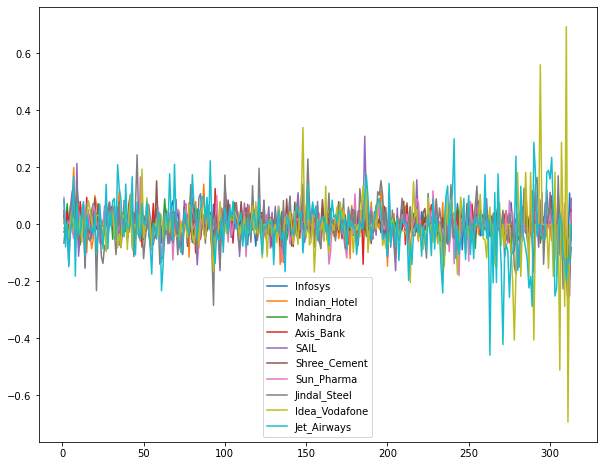

In [87]:
stock_returns.plot(figsize=(10,8))

In [89]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys          0.002794
Indian_Hotel     0.000266
Mahindra        -0.001506
Axis_Bank        0.001167
SAIL            -0.003463
Shree_Cement     0.003681
Sun_Pharma      -0.001455
Jindal_Steel    -0.004123
Idea_Vodafone   -0.010608
Jet_Airways     -0.009548
dtype: float64

In [90]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys          0.035070
Indian_Hotel     0.047131
Mahindra         0.040169
Axis_Bank        0.045828
SAIL             0.062188
Shree_Cement     0.039917
Sun_Pharma       0.045033
Jindal_Steel     0.075108
Idea_Vodafone    0.104315
Jet_Airways      0.097972
dtype: float64

In [91]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})

In [92]:
df.sort_values(by='Volatility',ascending=False)

,Average,Volatility
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972
Jindal_Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Indian_Hotel,0.000266,0.047131
Axis_Bank,0.001167,0.045828
Sun_Pharma,-0.001455,0.045033
Mahindra,-0.001506,0.040169
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070


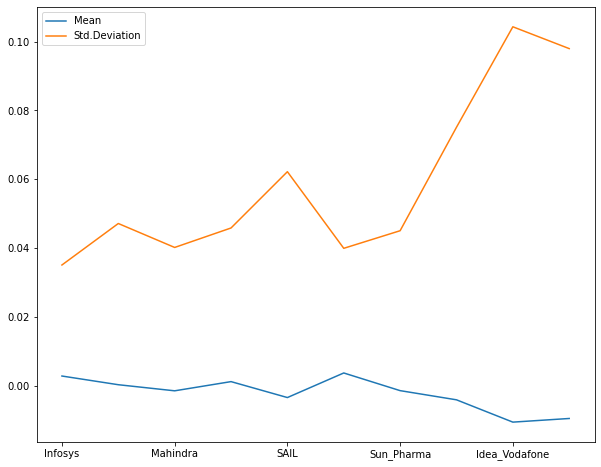

In [93]:
plt.figure(figsize=(10,8))
df.Average.plot()
df.Volatility.plot()
plt.legend(['Mean','Std.Deviation'])
plt.show()

Text(0.5, 1.0, 'Mean of all stocks')

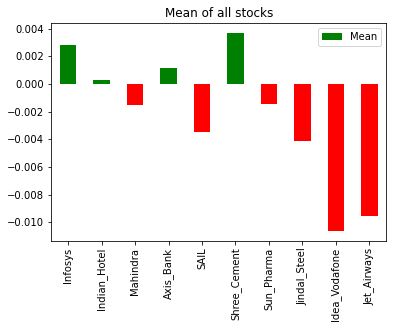

In [94]:
df['positive']=df['Average']>0
df['Average'].plot(kind='bar',color=df.positive.map({True: 'g', False: 'r'}))
plt.legend(["Mean", "Std. Deviation"])
plt.title("Mean of all stocks")

Text(0.5, 1.0, 'Std. Dev for all stocks')

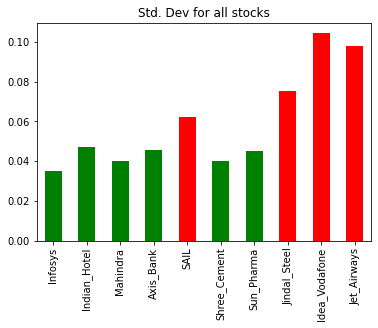

In [95]:
df['positive1']=df['Volatility']<=0.05
df['Volatility'].plot(kind='bar',color=df.positive1.map({True: 'g', False: 'r'}))
plt.title("Std. Dev for all stocks")

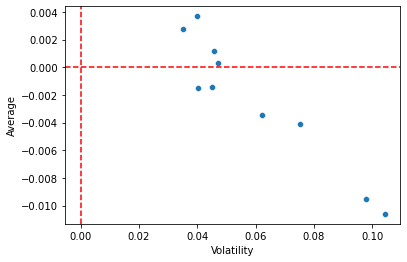

In [96]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.00,linestyle='--', color = "red")
plot.axhline(y=0.00,linestyle='--', color = "red")
plt.show()

In [97]:
df[df['Average'] > 0].sort_values(by = 'Volatility')

,Average,Volatility,positive,positive1
Infosys,0.002794,0.035070,True,True
Shree_Cement,0.003681,0.039917,True,True
Axis_Bank,0.001167,0.045828,True,True
Indian_Hotel,0.000266,0.047131,True,True


THE END!!!!